# Выполнение исследовательского проекта "Успеваемость обучающихся"

- Источник данных: Открытый датасет с платформы [Kaggle](https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance/data);
- Проблема: Успеваемость обучающихся может зависеть от множества факторов, включая уровень образования родителей, подготовку к тестам, питание и социально-экономическое положение. Изучение данных факторов может помочь выявить ключевые аспекты, влияющие на академические результаты обучающихся;
- Цель: Провести разведовательный анализ данных (EDA) и выявить, какие факторы (пол, этническая принадлежность, образование родителей, питание, подготовка к тестированию) оказывают влияние на успеваемость студентов;

## Задачи исследования:
- Познакомиться с данными, провести предобработку данных, если необходимо (очистка, обработка пропусков, приведение к нужному формату);
- Выполнить разведовательный анализ данных (EDA), найти корреляции между успеваемостью и различными факторами;
- Визуализировать данные с помощью инструментов визуализации и сделать выводы;
- Проверить гипотезы с помощью статистических тестов и сделать соответствующие выводы.

### Импорт необходимых библиотек:

In [27]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

### Знакомство с данными:

In [28]:
# Записываем файл csv в переменную study_data для дальнейшего анализа
study_data = pd.read_csv('data/study_performance.csv')

In [29]:
# Выводим первые 3 записи для знакомства с Dataset'ом
study_data.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [30]:
# Получаем общую информацию о признаках Dataset'а и количестве объектов
study_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Промежуточный вывод:**
- В Dataset'е **нет пропущенных значений**, соответственно **не нужно заполнять пропуски**;
- В Dataset'е всего **1000 записей (обьектов)**, представленных в признаковом пространстве из **8 признаков** (фичей);
- Типы данных в колонках Dataset'а соответствуют ожидаемым, **не нуждаются в переводе**.

In [31]:
# Вывод всех уникальных значений для категориальных признаков
categorical_columns = [column for column in study_data.columns if study_data[column].dtype != np.int64]
for col in categorical_columns:
    print(f"Колонка {col} содержит {study_data[col].nunique()} уникальных значения(ий): {list(study_data[col].unique())}")

Колонка gender содержит 2 уникальных значения(ий): ['female', 'male']
Колонка race_ethnicity содержит 5 уникальных значения(ий): ['group B', 'group C', 'group A', 'group D', 'group E']
Колонка parental_level_of_education содержит 6 уникальных значения(ий): ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
Колонка lunch содержит 2 уникальных значения(ий): ['standard', 'free/reduced']
Колонка test_preparation_course содержит 2 уникальных значения(ий): ['none', 'completed']


**Набор данных** содержит информацию о следующих признаках:

- **gender** – пол студента (male и female); 
- **race_ethnicity** – этническая группа (Group A, B, C, D, E); 
- **parental_level_of_education** – уровень образования родителей (bachelor's degree, some college, master's degree, associate's degree, high school, some high school); 
- **lunch** – тип питания (standard и free/reduced); 
- **test_preparation_course** – подготовка к тесту (none и completed); 
- **math_score** – оценка по математике; 
- **reading_score** – оценка по чтению; 
- **writing_score** - оценка по письму.

In [32]:
# Выводим дополнительную информацию о Dataset'е
study_data.describe(include='all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


**Промежуточные выводы:**
- В Dataset'е **нет выбросов, пропусков;**

**Категориальные признаки**:
- Чаще всего встречается **женский пол**: **female** (518 / 1000);
- Самая распространенная **этническая группа: group C**	(319 / 1000);
- Большинство родителей учились в **колледже**, но [не получили степени](https://cde.nida.nih.gov/instrument/f95e95e8-efae-362b-e040-bb89ad4314f1/module/f95e98db-b327-66b7-e040-bb89ad4351b0/question/fa657752-3f53-bece-e040-bb89ad433db6#:~:text=College%2C%20No%20Degree-,Some%20College,did%20not%20receive%20any%20degree.): **some college** (226 / 1000);
- Самый популярный **тип обеда: standard** (645 / 1000);
- Большинство обучающихся **не проходило подготовку к тесту** none (642 / 1000);

**Числовые признаки** (оценки обучающихся):
1. **math_score** (математика):
    - Средний балл: 66.09;
    - Минимальный: 0 баллов;
    - Максимальный: 100 баллов;
    - 75% студентов набрали 77 баллов и ниже (75-й перцентиль);
    - 50% студентов набрали 66 баллов и ниже (медиана);
    - 25% студентов набрали 57 баллов и ниже (25-й перцентиль);
2. **reading_score** (чтение):
    - Средний балл: 69.17;
    - Минимальный: 17 баллов;
    - Максимальный: 100 баллов;
    - 75% студентов набрали 79 баллов и ниже (75-й перцентиль);
    - 50% студентов набрали 70 баллов и ниже (медиана);
    - 25% студентов набрали 59 баллов и ниже (25-й перцентиль);
3. **writing_score** (письмо):
    - Средний балл: 68.05;
    - Минимальный: 10;
    - Максимальный: 100;
    - 75% студентов набрали 79 баллов и ниже (75-й перцентиль);
    - 50% студентов набрали 69 баллов и ниже (медиана);
    - 25% студентов набрали ~58 баллов и ниже (25-й перцентиль);


### Разведовательный анализ данных (EDA):

#### Проверка на **нормальность распределения числовых признаков**:

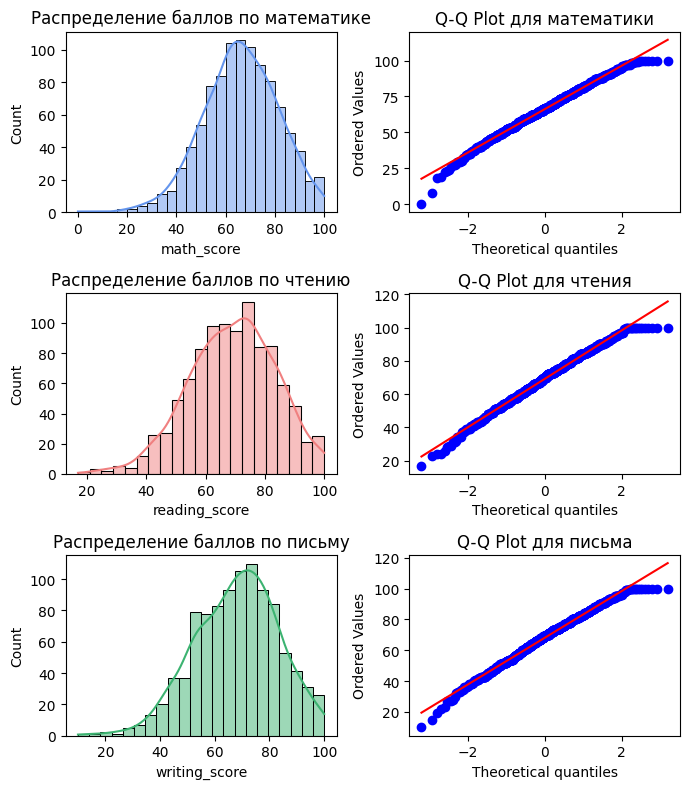

In [33]:
# Проверим распределение числовых признаков на нормальность с помощью гистограммы и q-q plot
fig, axes = plt.subplots(figsize=(7, 8), nrows=3, ncols=2)

# Гистограммы
sns.histplot(study_data['math_score'], ax=axes[0, 0], kde=True, color="cornflowerblue")
sns.histplot(study_data['reading_score'], ax=axes[1, 0], kde=True, color="lightcoral")
sns.histplot(study_data['writing_score'], ax=axes[2, 0], kde=True, color="mediumseagreen")

# Q-Q plots
stats.probplot(study_data['math_score'], plot=axes[0, 1])
stats.probplot(study_data['reading_score'], plot=axes[1, 1])
stats.probplot(study_data['writing_score'], plot=axes[2, 1])

# Подписи
axes[0, 0].set_title('Распределение баллов по математике')
axes[1, 0].set_title('Распределение баллов по чтению')
axes[2, 0].set_title('Распределение баллов по письму')
axes[0, 1].set_title('Q-Q Plot для математики')
axes[1, 1].set_title('Q-Q Plot для чтения')
axes[2, 1].set_title('Q-Q Plot для письма')

plt.tight_layout()
plt.show()

**Промежуточные выводы:**
- **Гистограммы** распределения признаков в виде **колоколов**, что характерно для **нормального распределения**;
- На **Q-Q Plot** точки в основном ложатся на **прямую линию**, что подтверждает **близость к нормальному распределению**, но на концах (в хвостах) есть небольшие отклонения;
- Данные с высокой вероятностью **распределены нормально**, однако в дальнейшем исследовании при проведении **статистических тестов** будет использован **тест Шапиро-Уилка** для проверки.

#### Корреляционный анализ:

##### Для **числовых признаков** (оценок):

In [34]:
# Построим корреляционную матрицу для проверки зависимости числовых признаков (оценок)
# Используем корреляцию Пирсона т.к. признаки нормально распределены и не имеют выбросов
corr_matrix = study_data.corr(numeric_only=True, method='pearson')
corr_matrix

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


**Корреляционная матрица показывает:**

- **Сильную положительную** связь между **чтением и письмом (0.95)**, что логично, так как навыки тесно связаны;
- **Более низкую**, но все равно **высокую корреляцию между математикой и чтением / письмом** (0.82 и 0.80 соответственно), что также логично, поскольку математика требует других навыков;

Оценки по этим предметам положительно связаны: **чем выше балл в одном, тем выше вероятность высоких баллов в других.**

##### Для связи **категориальных признаков** с числовыми (оценками):

Для каждого **категориального признака** выбираем **подходящий способ кодирования** для построения **корреляционной матрицы**:

- **gender** (2 значения без логического порядка): **Label Encoding** (0 и 1);

		{'female': 0, 'male': 1}
		
- **race_ethnicity** (5 значений без логического порядка): **Label Encoding** (0, 1, 2, 3, 4);

		{'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}

- **parental_level_of_education** (6 значений с логическим порядком): **Ordinal Encoding** (0, 1, 2, 3, 4, 5);

		{"some high school" : 0, "high school" : 1, "some college" : 2, "associate's degree" : 3, "bachelor's degree" : 4, "master's degree" : 5}

- **lunch** (2 значения без логического порядка): **Label Encoding** (0 и 1);

		{'free/reduced': 0, 'standard': 1}
    
- **test_preparation_course** (2 значения без логического порядка): **Label Encoding** (0 и 1);

		{'completed': 0, 'none': 1}

In [35]:
# Кодирование признаков по схеме выше:
study_data_corr = study_data.copy()
# LabelEncoder
lbl_encoder = LabelEncoder()
lbl_features = ['gender', 'race_ethnicity', 'lunch', 'test_preparation_course']
for features in lbl_features:
    study_data_corr[features] = lbl_encoder.fit_transform(study_data_corr[features])
# OrdinalEncoder
ord_encoder = ce.OrdinalEncoder(cols=['parental_level_of_education'], mapping=[{'col': 'parental_level_of_education', 
                                                                                'mapping': {"some high school": 0, "high school": 1, "some college": 2, "associate's degree": 3, 
                                                                                "bachelor's degree": 4, "master's degree": 5}}])
study_data_corr = ord_encoder.fit_transform(study_data_corr)

In [36]:
# Смотрим, что получилось
study_data_corr.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,4,1,1,72,72,74
1,0,2,2,1,0,69,90,88
2,0,1,5,1,1,90,95,93
3,1,0,3,0,1,47,57,44
4,1,2,2,1,1,76,78,75


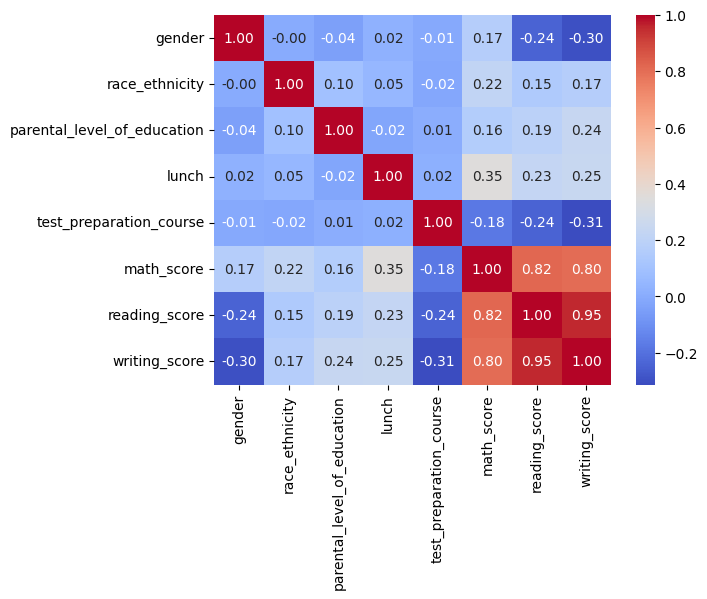

In [37]:
# Построим корреляционную матрицу
corr_matrix_all = study_data_corr.corr()
# Визуализируем corr_matrix_all
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

Промежуточные выводы по **корреляционной матрице**:

- Умеренная положительная корреляция **lunch** с **math_score** (0.35), **reading_score** (0.23) и **writing_score** (0.25). Данные результаты могут свидетельствовать о том, что питание связано с результатами по тестам, особенно по математике;
- **gender** имеет умеренную отрицательную корреляцию с гуманитарными предметами: **reading_score** (-0.24), **writing_score** (-0.30), однако очень слабую положительную корреляцию (0,17) по математике. Данные результаты могут указывать на гендерные различия в успеваемости; 
- **test_preparation_course** имеет слабую отрицательную корреляцию с оценками: **math_score** (-0.18), **reading_score** (-0.24), **writing_score** (-0.31). Данный факт слегка противоречит ожиданиям;
- **parental_level_of_education** слабо связан с оценками (0.16–0.24), что может говорить о незначительном влиянии образования родителей на успеваемость детей;
- **race_ethnicity** очень слабо коррелирует с оценками по гуманитарным предметам (0,15 и 0,17), однако более выражен в случае математики (0,22).

### Визуализация данных:

##### **Круговая диаграмма** распределения **уровня образования родителей** обучающихся:

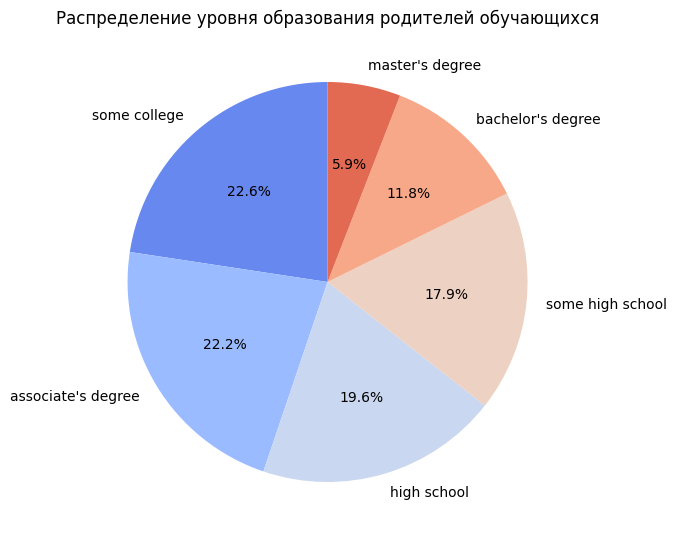

In [38]:
# Круговая диаграмма распределения уровня образования родителей обучающихся 
fig = plt.figure(figsize = (5, 5))
axes = fig.add_axes([0, 0, 1, 1])

parental_level_of_education_count = study_data['parental_level_of_education'].value_counts()
axes.pie(x=parental_level_of_education_count, labels=parental_level_of_education_count.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("coolwarm"))

plt.title("Распределение уровня образования родителей обучающихся")
plt.show()

Промежуточные выводы по **круговой диаграмме**:

1. Наибольшие доли диаграммы занимают родители с **"some college" (22.6%)** и **"associate's degree" (22.2%)**;
2. **Заметная доля родителей окончила только школу** ("high school" (19.6%)) или **не окончили ее совсем** ("some high school" (17.9%)) - составляют **более трети**. Это может означать, что часть студентов являются первыми в семье, кто получает высшее образование;
3. Только **11.8%** имеют **"bachelor's degree"**;
4. Лишь **5.9%** получили **"master's degree"**, что является наименьшей категорией из всех.

##### **Круговая диаграмма** распределения **этнических групп** обучающихся:

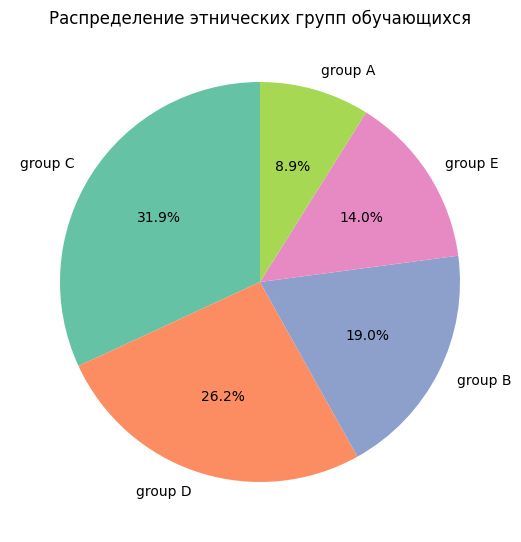

In [39]:
# Круговая диаграмма распределения этнических групп обучающихся  
fig = plt.figure(figsize = (5, 5))
axes = fig.add_axes([0, 0, 1, 1])

race_ethnicity = study_data['race_ethnicity'].value_counts()
axes.pie(x=race_ethnicity, labels=race_ethnicity.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("Set2"))

plt.title("Распределение этнических групп обучающихся")
plt.show()

Промежуточные выводы по **круговой диаграмме**:

1. **Преобладающая группа — Group C (31.9%)**: самая большая этническая группа, составляющая **почти треть** диаграммы;
2. **Group D (26.2%) также представлена широко** - вторая по численности группа, охватывающая **чуть больше четверти** всех обучающихся;
3. **Средняя представленность у Group B (19%)**;
4. **Меньшая доля у Group E (14%) и Group A (8.9%)**.

##### Распределение **баллов** в зависимости от **пола**:

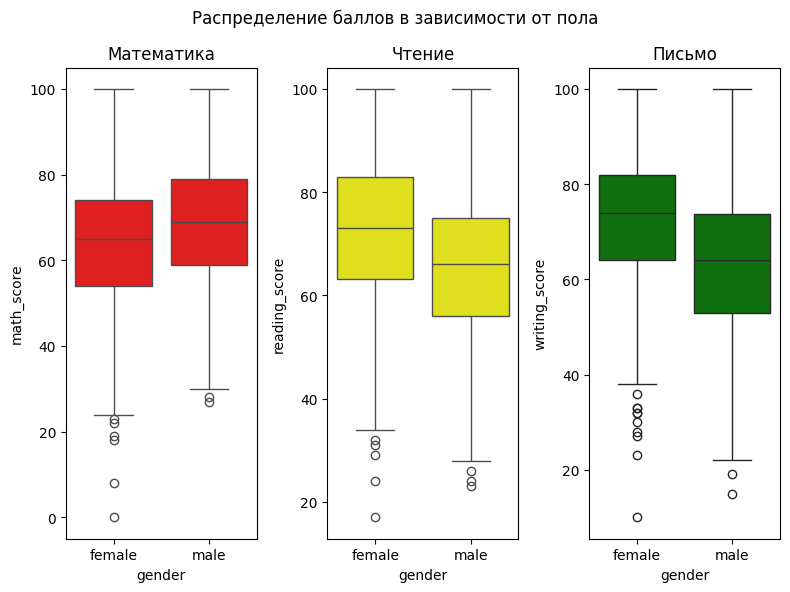

In [40]:
# Распределение баллов по математике в зависимости от пола
fig, axes = plt.subplots(figsize=(8, 6), nrows=1, ncols=3)

sns.boxplot(x="gender", y="math_score", data=study_data, ax=axes[0], color='red')
axes[0].set_title("Математика")

sns.boxplot(x="gender", y="reading_score", data=study_data, ax=axes[1], color='yellow')
axes[1].set_title("Чтение")

sns.boxplot(x="gender", y="writing_score", data=study_data, ax=axes[2], color='green')
axes[2].set_title("Письмо")

fig.suptitle("Распределение баллов в зависимости от пола")
plt.tight_layout()
plt.show()

**Промежуточные выводы** по данным графикам:

**Математика:**
- Обучающиеся **мужского пола** имеют более **высокую медиану оценок** по сравнению с женским полом;
- **Минимальные баллы** у мужчин также **выше**;
- У **девочек** **больше** значений **в нижней части** (очень низкие оценки);
- **Разброс** оценок **больше у девочек**;

**Чтение и письмо:**
- Обучающиеся **женского пола** имеют **более высокую медиану оценок** по сравнению с мужским полом;
- **Разброс** оценок **больше у мальчиков**;

**Предварительный итог:**
- **Мальчики лучше в математике**;
- **Девочки лучше в чтении и письме**;
- У **девоче**к оценки по **чтению и письму более стабильны**, а у **мальчиков** наблюдается **больший разброс**. В **математике** же у **мальчиков** **меньше** низких значений и **выше медиана**.

##### Распределение **средних баллов** по дисциплинам в зависимости от **этнической группы:**

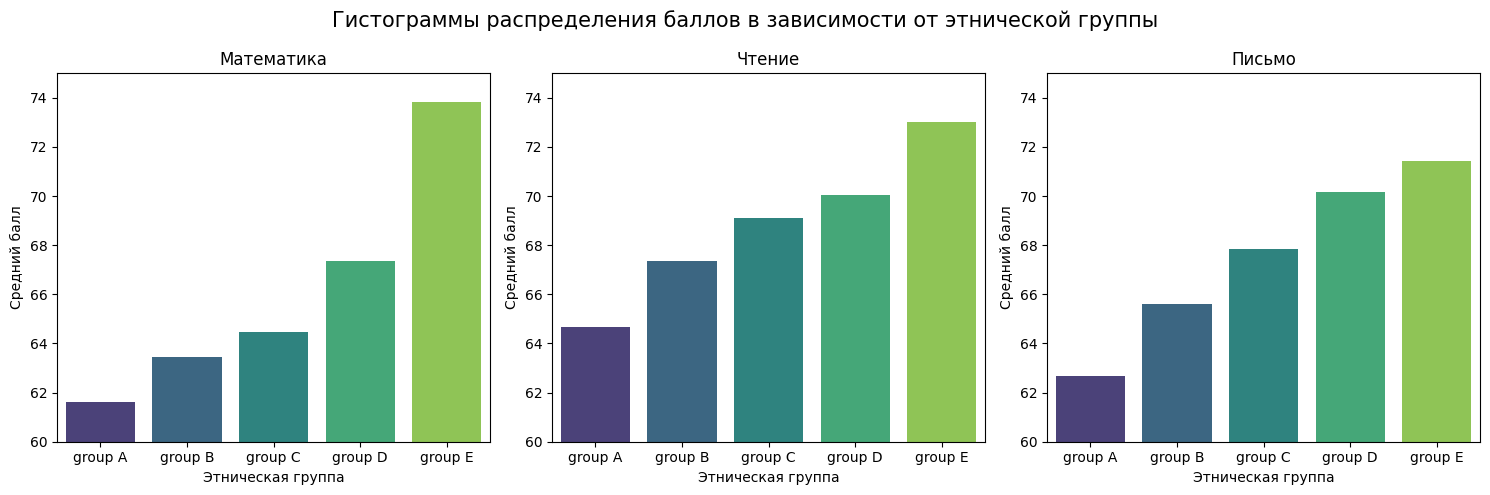

In [41]:
# Cредние значения баллов по различным предметам в зависимости от этнической группы
fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
study_data_for_barplot = study_data.groupby(by='race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()

sns.barplot(data=study_data_for_barplot, y='math_score', x='race_ethnicity', hue='race_ethnicity', palette="viridis", ax=axes[0])
axes[0].set_title('Математика')
axes[0].set_ylabel('Средний балл')
axes[0].set_xlabel('Этническая группа')
axes[0].set_ylim(60, 75)  # Устанавливаем диапазон оси Y от 60 до 75 (для наглядности)

sns.barplot(data=study_data_for_barplot, y='reading_score', x='race_ethnicity', hue='race_ethnicity', palette="viridis", ax=axes[1])
axes[1].set_title('Чтение')
axes[1].set_ylabel('Средний балл')
axes[1].set_xlabel('Этническая группа')
axes[1].set_ylim(60, 75) 

sns.barplot(data=study_data_for_barplot, y='writing_score', x='race_ethnicity', hue='race_ethnicity', palette="viridis", ax=axes[2])
axes[2].set_title('Письмо')
axes[2].set_ylabel('Средний балл')
axes[2].set_xlabel('Этническая группа')
axes[2].set_ylim(60, 75) 

fig.suptitle("Гистограммы распределения баллов в зависимости от этнической группы", fontsize=15)
plt.tight_layout()
plt.show()

Промежуточные выводы по **гистограммам распределений**:

- Этническая группа **group E** показывает **наивысшие средние баллы** по всем **трём дисциплинам**: математике, чтению и письму, с показателями около 74, 73 и 71 соответвенно;
- Наиболее **низкие результаты** по **всем дисциплинам** наблюдаются у этнической группы **group A**, где средние баллы по математике, чтению и письму составляют около 62, 64 и 62 соответвенно, что значительно ниже, чем у других групп;
- **Наибольшее различие** в успеваемости между группами проявляется **в дисциплине математика**. Группа **group E** опережает группу **group A** примерно на **12 баллов** (74 против 62);
- Группы **group B** и **group C** показывают **промежуточные результаты**, с баллами, находящимися **в диапазоне между группами A и E**, но с небольшими вариациями в зависимости от дисциплины;
- Группа **group D** также показывает хорошие, но более низкие результаты по сравнению с **group E**. Однако, по **письму** различия между группами **менее выражены**, чем в **математике и чтении**.

##### Распределение **баллов** по предметам в зависимости от **типа питания**:

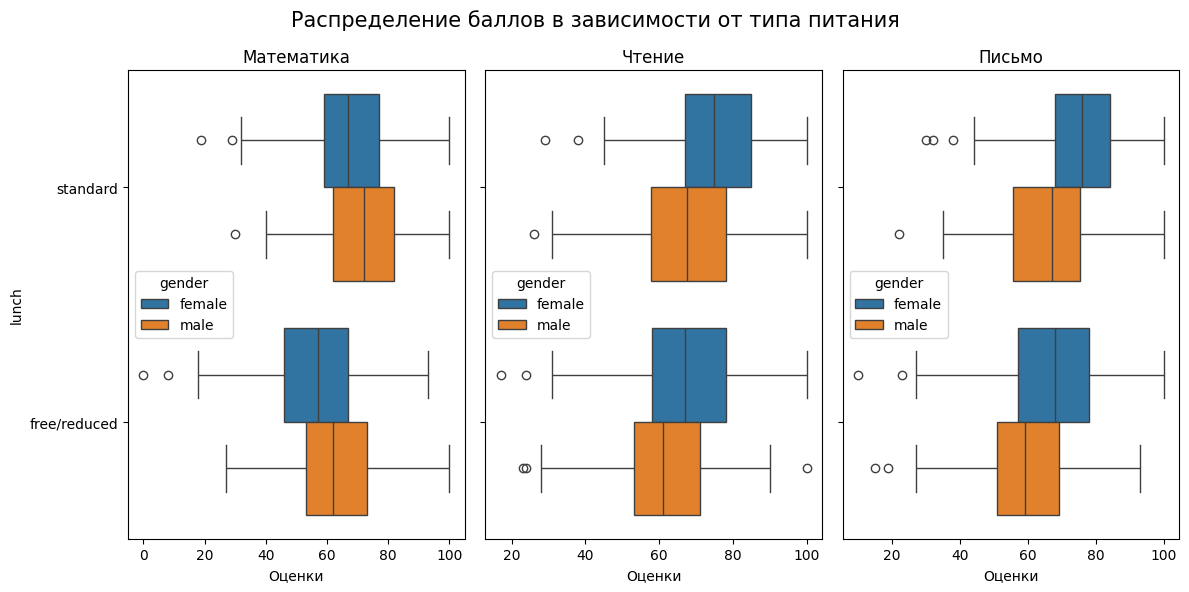

In [42]:
# Распределение баллов по математике
fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=3, sharey=True)

sns.boxplot(x="math_score", y="lunch", hue="gender", data=study_data, ax=axes[0])
axes[0].set_title("Математика")
axes[0].set_xlabel("Оценки")

sns.boxplot(x="reading_score", y="lunch", hue="gender", data=study_data, ax=axes[1])
axes[1].set_title("Чтение")
axes[1].set_xlabel("Оценки")

sns.boxplot(x="writing_score", y="lunch", hue="gender", data=study_data, ax=axes[2])
axes[2].set_title("Письмо")
axes[2].set_xlabel("Оценки")

fig.suptitle("Распределение баллов в зависимости от типа питания", fontsize=15)
plt.tight_layout()
plt.show()

Промежуточные выводы по данным графикам:

- Cтуденты с **льготным питанием** (free/reduced) получают более **низкие оценки**, чем те, кто питается **стандартно (standard)**;
- **Разброс оценок** шире у студентов с **льготным питанием** - более высокая вариативность оценок.

##### Распределение **средних баллов** по предметам в зависимости от **уровня образования родителей:**

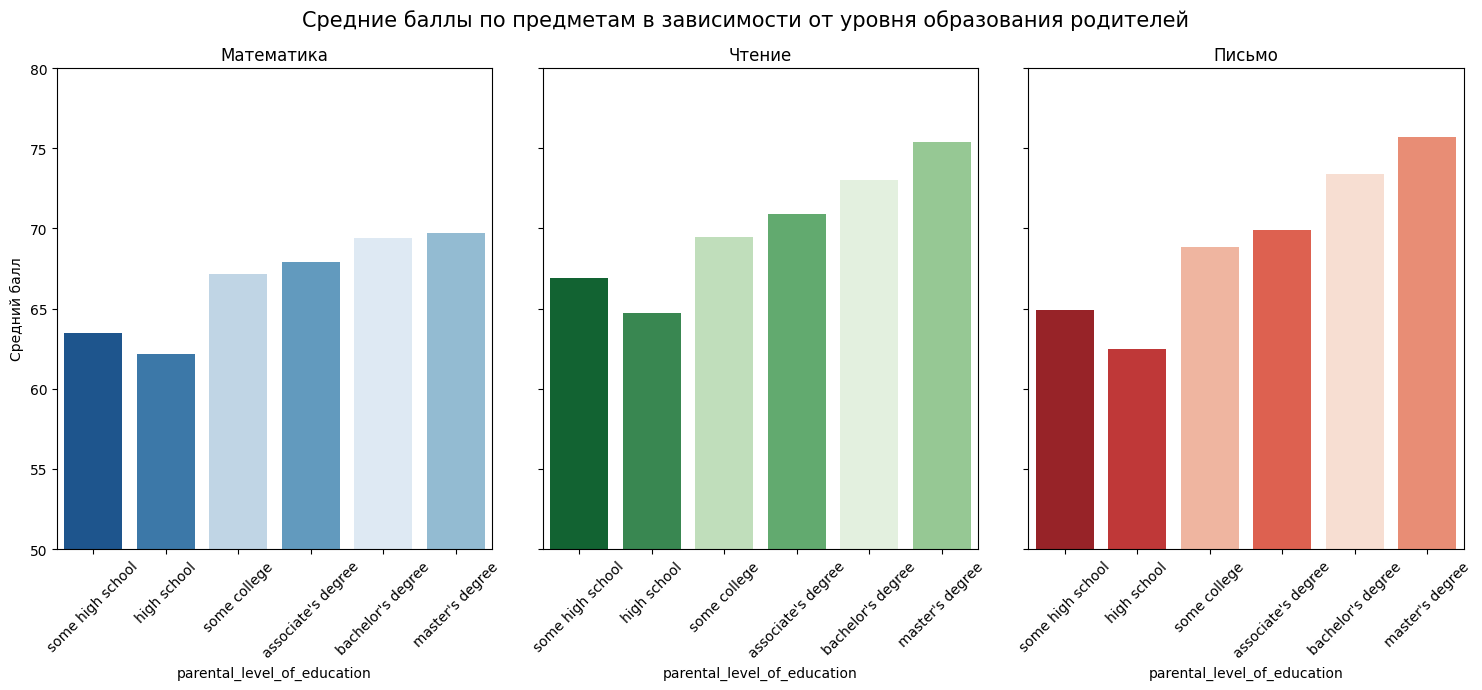

In [43]:
# Распределение средних баллов по предметам в зависимости от уровня образования родителей
fig, axes = plt.subplots(figsize=(15, 7), nrows=1, ncols=3, sharey=True)
# Сортируем уровни образования от большего к меньшему
education_order = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]

sns.barplot(data=study_data, x="parental_level_of_education", y="math_score", palette="Blues", ax=axes[0], order=education_order, hue="parental_level_of_education", errorbar=None)
axes[0].set_title("Математика")
axes[0].set_ylabel("Средний балл")
axes[0].xaxis.set_tick_params(rotation=45)
axes[0].set_ylim(50, 80)  # Устанавливаем диапазон оси Y от 50 до 80 (для наглядности)

sns.barplot(data=study_data, x="parental_level_of_education", y="reading_score", palette="Greens", ax=axes[1], order=education_order, hue="parental_level_of_education", errorbar=None)
axes[1].set_title("Чтение")
axes[1].xaxis.set_tick_params(rotation=45)
axes[1].set_ylim(50, 80) 

sns.barplot(data=study_data, x="parental_level_of_education", y="writing_score", palette="Reds", ax=axes[2], order=education_order, hue="parental_level_of_education", errorbar=None)
axes[2].set_title("Письмо")
axes[2].xaxis.set_tick_params(rotation=45)
axes[2].set_ylim(50, 80) 

plt.suptitle("Средние баллы по предметам в зависимости от уровня образования родителей", fontsize=15)
plt.tight_layout()
plt.show()

Промежуточные выводы по **гистограммам распределений**:

- **Образование** родителей **влияет** на **успеваемость** обучающихся;
- Чем **выше уровень образования родителей**, тем **выше средний балл** детей;
- В **математике** разница **не так сильно выражена**, но все же наблюдается **рост баллов** при **увеличении уровня образования родителей**;
- Интересно, что дети родителей, **не закончивших школу** (some high school), показывают **результаты выше**, чем дети родителей с **полным школьным образованием** (high school);
- **Наибольшие средние баллы** по всем предметам у детей родителей с **степенью магистра** (master's degree);
- **Наименьшие баллы** у детей родителей с **средним образованием** (high school).


#### Распределение **средних баллов** по предметам в зависимости от **подготовки к тесту** в **разрезе этнических групп**:

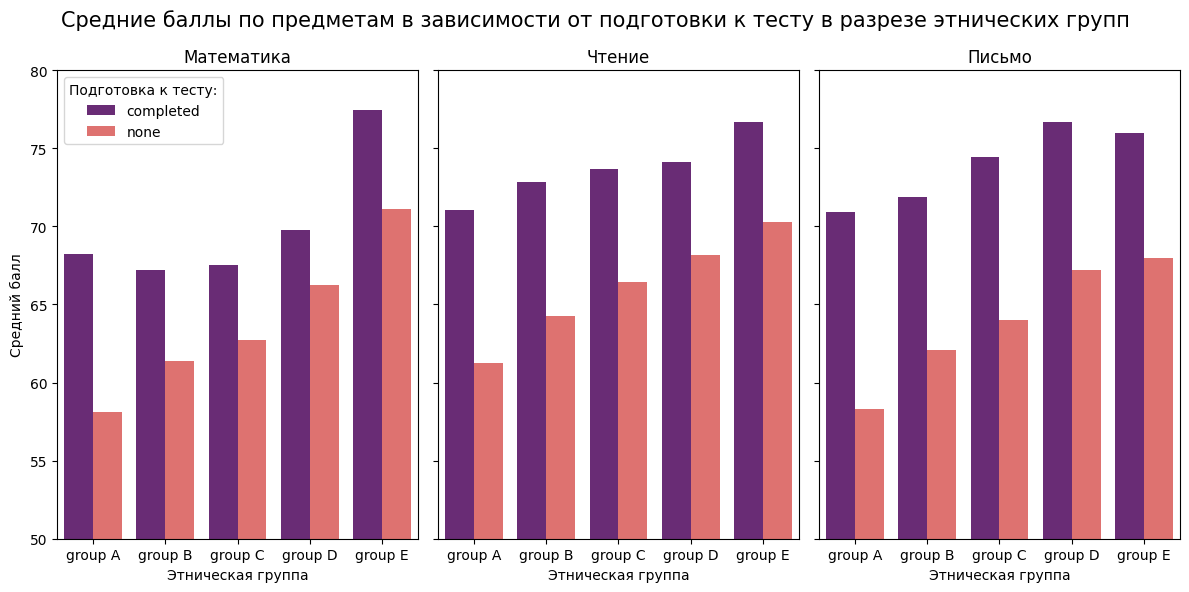

In [44]:
# Распределение средних баллов по предметам в зависимости от подготовки к тесту в разрезе этнических групп
fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=3, sharey=True)

# Группируем данные по этнической группе и подготовке к тесту
study_prep_data = study_data.groupby(["test_preparation_course", "race_ethnicity"])[["math_score", "reading_score", "writing_score"]].mean()

sns.barplot(data=study_prep_data, x="race_ethnicity", y="math_score", hue="test_preparation_course", palette="magma", ax=axes[0])
axes[0].set_title("Математика")
axes[0].set_ylabel("Средний балл")
axes[0].set_xlabel("Этническая группа")
axes[0].set_ylim(50, 80)
axes[0].legend(title="Подготовка к тесту:")

sns.barplot(data=study_prep_data, x="race_ethnicity", y="reading_score", hue="test_preparation_course", palette="magma", ax=axes[1], legend=False)
axes[1].set_title("Чтение")
axes[1].set_xlabel("Этническая группа")
axes[1].set_ylim(50, 80)

sns.barplot(data=study_prep_data, x="race_ethnicity", y="writing_score", hue="test_preparation_course", palette="magma", ax=axes[2], legend=False)
axes[2].set_title("Письмо")
axes[2].set_xlabel("Этническая группа")
axes[2].set_ylim(50, 80)

plt.suptitle("Средние баллы по предметам в зависимости от подготовки к тесту в разрезе этнических групп", fontsize=15)
plt.tight_layout()
plt.show()

Промежуточные выводы по **гистограммам распределений**:

- Обучающиеся, **не прошедшие подготовку** к тесту, имеют **более низкие баллы** по **всем дисциплинам** **во всех этнических группах**.

### Гипотезы и статистические тесты:

##### Дополнительная **проверка** распределений баллов обучающихся на **нормальность** с помощью **теста Шапиро-Уилка**:

`Нулевая гипотеза:` данные распределены **нормально**;

`Альтернативная гипотеза:` данные **не распределены нормально**;

**Уровень значимости** = **0.05**.

In [45]:
# Функция для проверки распределения на нормальность
def normal_distribution(p_value, alpha=0.05):
    """
    Проверяет распределение данных на нормальность на основе значения p-value.
    - p_value: Значение p-value из теста на нормальность.
    - alpha: Уровень значимости.
    """
    if p_value <= alpha:
        print(f'Значение p-value={p_value:.2f} меньше или равно уровня значимости alpha={alpha}.')
        print('Отклоняем нулевую гипотезу в пользу альтернативной.')
        print('Распределение данных не является нормальным.')
    else:
        print(f'Значение p-value={p_value:.2f} больше уровня значимости alpha={alpha}.')
        print('Нет оснований отклонять нулевую гипотезу.')
        print('Распределение данных c большей вероятностью является нормальным.')

In [46]:
# Проверяем распределение оценок по дисциплинам (тест Шапиро-Уилка)
# Математика
print('Данные по математике:')
_, p_value = stats.shapiro(study_data['math_score'])
# Интерпретация результата с использованием функции
normal_distribution(p_value)
print()

# Чтение
print('Данные по чтению:')
_, p_value = stats.shapiro(study_data['reading_score'])
# Интерпретация результата с использованием функции
normal_distribution(p_value)
print()

# Письмо
print('Данные по письму:')
_, p_value = stats.shapiro(study_data['writing_score'])
# Интерпретация результата с использованием функции
normal_distribution(p_value)
print()

Данные по математике:
Значение p-value=0.00 меньше или равно уровня значимости alpha=0.05.
Отклоняем нулевую гипотезу в пользу альтернативной.
Распределение данных не является нормальным.

Данные по чтению:
Значение p-value=0.00 меньше или равно уровня значимости alpha=0.05.
Отклоняем нулевую гипотезу в пользу альтернативной.
Распределение данных не является нормальным.

Данные по письму:
Значение p-value=0.00 меньше или равно уровня значимости alpha=0.05.
Отклоняем нулевую гипотезу в пользу альтернативной.
Распределение данных не является нормальным.



##### **Статистические тесты:**

##### 1. **Пол** влияет на **успеваемость** обучающихся по **математике**?

`Нулевая гипотеза:` Средние баллы у мальчиков по математике не больше, чем у девочек (равны или меньше).

`Альтернативная гипотеза:` Средние баллы у мальчиков по математике больше, чем у девочек.

`Статистический тест:` **U-критерий Манна-Уитни**.

1. **Тип признака**: **количественный** (баллы обучающихся по математике);
2. **Количество сравниваемых групп**: **2 (мальчики и девочки)**;
3. **Группы независимы**: баллы обучающихся независимы;
4. **Распределения баллов не являются нормальными** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста**: U-критерий Манна-Уитни (непараметрический тест для 2х  независимых групп).

In [47]:
# Функция для интерпретации результатов тестов
def result_stat_test(p_value, alpha=0.05):
    """
    Интерпретирует результат статистического теста.
    p_value - значение теста.
    alpha - уровень значимости (по умолчанию 0.05).
    """
    if p_value <= alpha:
        print(f'p-значение {p_value:.3f} меньше, чем заданный уровень значимости {alpha}.')
        print(f'Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.')
    else:
        print(f'p-значение {p_value:.3f} больше, чем заданный уровень значимости {alpha}.') 
        print(f'Нет статистически значимых оснований отвергнуть нулевую гипотезу.')

In [48]:
# Разделяем данные по полу
male_scores = study_data[study_data['gender'] == 'male']['math_score']
female_scores = study_data[study_data['gender'] == 'female']['math_score']

# Применяем U-критерий Манна-Уитни (мальчики > девочек)
_, p_value = stats.mannwhitneyu(male_scores, female_scores, alternative='greater')
print(f'p-value = {p_value:.3f}')
result_stat_test(p_value)

p-value = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.


**Вывод:** 

По результатам **статистического теста U-критерия Манна-Уитни** подтверждается наблюдение, сделанное ранее на **box-plot**: **средние баллы** по **математике** у **мальчиков** статистически значимо **выше**, чем у **девочек**.

##### 2. **Образование родителей** влияет на **успеваемость**?

`Нулевая гипотеза:` Средние баллы обучающихся с разным уровнем образования родителей одинаковы.

`Альтернативная гипотеза:` Средние баллы обучающихся с разным уровнем образования родителей различаются.


`Статистический тест:` **Критерий Краскела-Уоллиса**.

1. **Тип признака**: **количественный** (баллы обучающихся);
2. **Количество сравниваемых групп**: **6** (уровни образования родителей);
3. **Группы независимы**: баллы обучающихся независимы;
4. **Распределения баллов не являются нормальными** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста**: Критерий Краскела-Уоллиса (непараметрический тест для более 3х независимых групп).

In [49]:
# Список дисциплин
subjects = ['math_score', 'reading_score', 'writing_score']
# Уровни образования родителей
education_levels = study_data['parental_level_of_education'].unique()

for subject in subjects:
    print(f'Анализ для дисциплины: {subject}')
    # Разделяем данные по уровню образования родителей для каждой дисциплины
    education_data = [study_data[study_data['parental_level_of_education'] == level][subject] for level in education_levels]
    # Применяем критерий Краскела-Уоллиса
    _, p_value = stats.kruskal(*education_data)
    print(f'p-value для {subject} = {p_value:.3f}')
    result_stat_test(p_value)
    print()

Анализ для дисциплины: math_score
p-value для math_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.

Анализ для дисциплины: reading_score
p-value для reading_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.

Анализ для дисциплины: writing_score
p-value для writing_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.



**Вывод:**

Результаты теста **Краскела-Уоллиса** показали, что **уровень образования родителей** значимо **влияет на успеваемость обучающихся** по всем предметам (математика, чтение, письмо).

Данный **результат** **подтверждает** ранее полученные выводы при **анализе распределения средних баллов по предметам в зависимости от уровня образования родителей**.

##### 3. **Этническая группа** влияет на **успеваемость**?

`Нулевая гипотеза:` Средние баллы обучающихся из разных этнических групп одинаковы.

`Альтернативная гипотеза:` Средние баллы обучающихся из разных этнических групп различаются.

`Статистический тест:` **Критерий Краскела-Уоллиса**.

1. **Тип признака**: **количественный** (баллы обучающихся);
2. **Количество сравниваемых групп**: **5** (этнические группы);
3. **Группы независимы**: баллы обучающихся независимы;
4. **Распределения баллов не являются нормальными** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста**: Критерий Краскела-Уоллиса (непараметрический тест для более 3х независимых групп).

In [50]:
# Список дисциплин
subjects = ['math_score', 'reading_score', 'writing_score']
# Этнические группы
ethnic_groups = study_data['race_ethnicity'].unique()

for subject in subjects:
    print(f'Анализ для дисциплины: {subject}')
    # Разделяем данные по этническим группам
    ethnic_data = [study_data[study_data['race_ethnicity'] == group][subject] for group in ethnic_groups]
    # Применяем критерий Краскела-Уоллиса
    _, p_value = stats.kruskal(*ethnic_data)
    print(f'p-value для {subject} = {p_value:.3f}')
    result_stat_test(p_value)
    print()

Анализ для дисциплины: math_score
p-value для math_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.

Анализ для дисциплины: reading_score
p-value для reading_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.

Анализ для дисциплины: writing_score
p-value для writing_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.



**Вывод:**

Результаты теста показывают, что **есть статистически значимые основания** отвергнуть нулевую гипотезу в **пользу альтернативной** - **этническая группа** действительно **влияет на успеваемость обучающихся**.

Этот вывод **подтверждается данными**, полученными ранее при анализе **распределения средних баллов по дисциплинам в зависимости от этнической группы**. Мы наблюдали **различия** в средних значениях баллов между этническими группами.

##### 4. **Тип питания** влияет на **успеваемость**?

`Нулевая гипотеза:` Средние баллы обучающихся с разными типами питания одинаковы.

`Альтернативная гипотеза:` Средние баллы обучающихся с разными типами питания различаются.

`Статистический тест:` **U-критерий Манна-Уитни**.

1. **Тип признака**: **количественный** (баллы обучающихся);
2. **Количество сравниваемых групп**: **2** (типы питания);
3. **Группы независимы**: баллы обучающихся независимы;
4. **Распределения баллов не являются нормальными** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста**: U-критерий Манна-Уитни (непараметрический тест для 2х независимых групп).

In [51]:
# Список дисциплин
subjects = ['math_score', 'reading_score', 'writing_score']

for subject in subjects:
    print(f'Анализ для дисциплины: {subject}')
    
    # Разделяем данные по типу питания
    standard_meal = study_data[study_data['lunch'] == 'standard'][subject]
    free_reduced_meal = study_data[study_data['lunch'] == 'free/reduced'][subject]
    
    # Применяем U-критерий Манна-Уитни
    _, p_value = stats.mannwhitneyu(standard_meal, free_reduced_meal)
    
    print(f'p-value для {subject} = {p_value:.3f}')
    result_stat_test(p_value)
    print()

Анализ для дисциплины: math_score
p-value для math_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.

Анализ для дисциплины: reading_score
p-value для reading_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.

Анализ для дисциплины: writing_score
p-value для writing_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.



**Вывод:**

Результаты теста показывают, что **есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной** - **тип питания влияет на успеваемость обучающихся**.  

Этот вывод подтверждается данными, полученными ранее при анализе **распределения средних баллов по дисциплинам в зависимости от типа питания**.

##### 5. Прохождение **подготовительного курса** влияет на **успеваемость**?

`Нулевая гипотеза:` Средние баллы обучающихся, прошедших и не прошедших подготовительный курс, не отличаются.

`Альтернативная гипотеза:` Средние баллы у обучающихся, прошедших подготовительный курс, больше.

`Статистический тест:` **U-критерий Манна-Уитни**.

1. **Тип признака**: **количественный** (баллы обучающихся);
2. **Количество сравниваемых групп**: **2** (прошедшие курс и не прошедшие);
3. **Группы независимы**;
4. **Распределения баллов не являются нормальными** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста**: U-критерий Манна-Уитни (непараметрический тест для 2х независимых групп).

In [52]:
# Дисциплины для анализа
subjects = ['math_score', 'reading_score', 'writing_score']

# Разделяем данные по подготовительному курсу
for subject in subjects:
    print(f'Анализ для дисциплины: {subject}')
    
    completed_test = study_data[study_data['test_preparation_course'] == 'completed'][subject]
    none_test = study_data[study_data['test_preparation_course'] == 'none'][subject]
    
    # Применяем U-критерий Манна-Уитни
    _, p_value = stats.mannwhitneyu(completed_test, none_test, alternative='greater')
    
    print(f'p-value для {subject} = {p_value:.3f}')
    result_stat_test(p_value)
    print()

Анализ для дисциплины: math_score
p-value для math_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.

Анализ для дисциплины: reading_score
p-value для reading_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.

Анализ для дисциплины: writing_score
p-value для writing_score = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Есть статистически значимые основания отвергнуть нулевую гипотезу в пользу альтернативной.



**Вывод:**

Результаты статистического теста **U-критерий Манна-Уитни** показали, что студенты, прошедшие **подготовительный курс**, получают **значимо более высокие баллы** по всем предметам.  

Ранее в **корреляционной матрице** мы обратили внимание, что признак **test_preparation_course** имеет **слабую отрицательную корреляцию** с оценками. Данный факт **слегка противоречил ожиданиям**, однако полученные результаты теста подтверждают, что **подготовка к экзамену всё же положительно влияет на успеваемость**.  

**Гистограммы распределений** также показали, что обучающиеся, **не прошедшие подготовительный курс**, имеют **более низкие баллы** по всем дисциплинам** **во всех этнических группах**.